In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/Du lieu thue xe.csv')
df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615.0,135.0,Tesla,Model X,suv,2019.0,Albuquerque
1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242.0,190.0,Tesla,Model X,suv,2018.0,Albuquerque
2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256.0,35.0,Toyota,Prius,car,2012.0,Albuquerque
3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496.0,75.0,Ford,Mustang,car,2018.0,Albuquerque
4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565.0,47.0,Chrysler,Sebring,car,2010.0,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,32.0,27.0,Honolulu,US,21.292950,-157.836856,HI,9794111.0,33.0,Chevrolet,Cruze,car,2017.0,Honolulu
5847,HYBRID,5.00,17.0,16.0,Aiea,US,21.375507,-157.914919,HI,2754690.0,49.0,Lexus,HS 250h,car,2010.0,Honolulu
5848,GASOLINE,4.94,18.0,17.0,Kailua,US,21.378719,-157.727816,HI,11313508.0,35.0,smart,fortwo,car,2013.0,Honolulu
5849,GASOLINE,NaN,1.0,0.0,Waipahu,US,21.376105,-158.020237,HI,4209883.0,77.0,GMC,Savana,van,2015.0,Honolulu


In [2]:
print(df.isnull().sum())


fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airportcity             0
dtype: int64


<Axes: xlabel='location.state'>

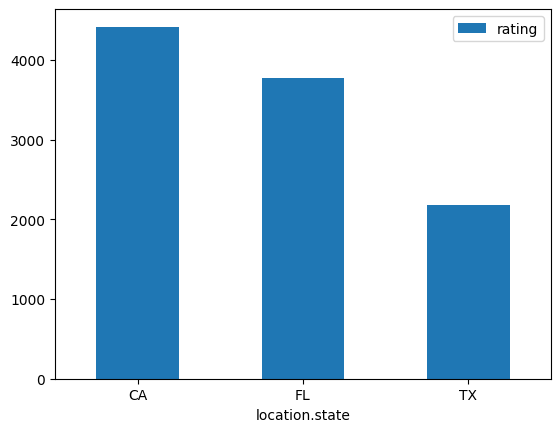

In [13]:
'1) Visualize top 3 state that uses the most cars.'
state = df[['rating','location.state']]
state = state.groupby('location.state', as_index=False).sum()
state = state.sort_values(by= ['rating'], ascending=False)
top3 = state.iloc[:3]
top3.plot.bar(x = 'location.state', y = 'rating', rot = 0)

<Axes: xlabel='location.city'>

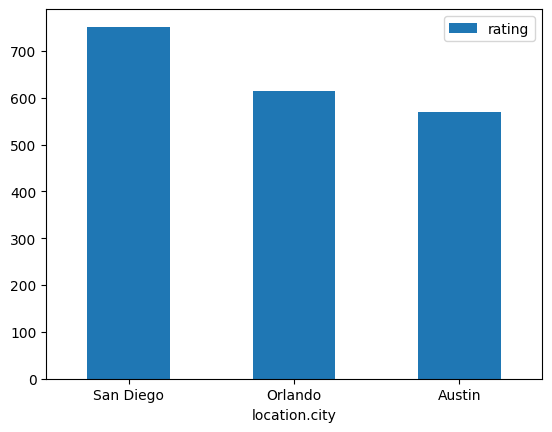

In [18]:
'2) Visualize top 3 cities that uses the most cars under those top 3 states.'
top_state = ['CA', 'FL', 'TX']
mask = df['location.state'].isin(top_state)
city = df[mask]
city = city.groupby('location.city', as_index=False).sum()
city = city.sort_values(by= ['rating'], ascending=False)
top3_city = city.iloc[:3]
top3_city.plot.bar(x = 'location.city', y = 'rating', rot = 0)


3) Visualize top 5 states with max owners.



<Axes: xlabel='location.state'>

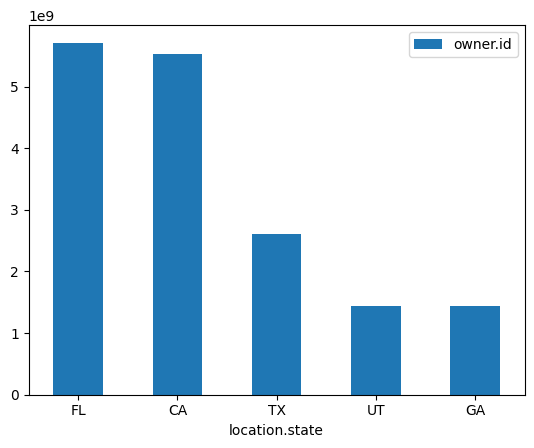

In [28]:
state_o = df[['owner.id','location.state']]
state_o = state_o.groupby('location.state', as_index=False).sum()
state_o = state_o.sort_values(by= ['owner.id'], ascending=False)
top5_o = state_o.iloc[:5]
top5_o.plot.bar(x = 'location.state', y = 'owner.id', rot = 0)

4) Visualize top 3 cities under Top 3 states with max owners



<Axes: xlabel='location.city'>

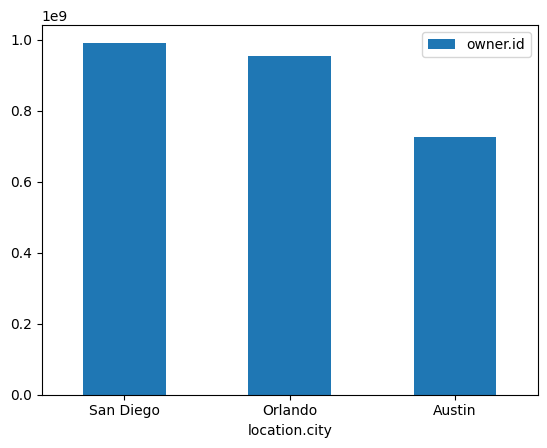

In [30]:
top_state = list(top5_o['location.state'])
mask = df['location.state'].isin(top_state)
city_o = df[mask]
city_o = city_o.groupby('location.city', as_index=False).sum()
city_o = city_o.sort_values(by= ['owner.id'], ascending=False)
top3_cityo = city_o.iloc[:3]
top3_cityo.plot.bar(x = 'location.city', y = 'owner.id', rot = 0)

5) Visualize top owners who own max cars



<Axes: xlabel='owner.id'>

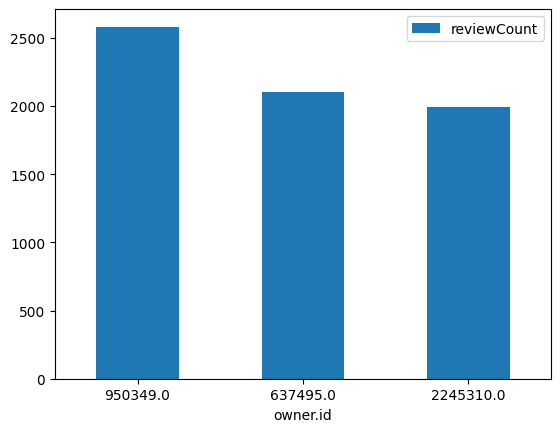

In [34]:
owner = df[['owner.id','reviewCount']]
owner = owner.groupby('owner.id', as_index=False).sum()
owner = owner.sort_values(by= ['reviewCount'], ascending=False)
owner = owner.iloc[:3]
owner.plot.bar(x = 'owner.id', y = 'reviewCount', rot = 0)

7) Visualize top 5 vehicle makers who helped making most avg. daily rate



<Axes: xlabel='vehicle.make'>

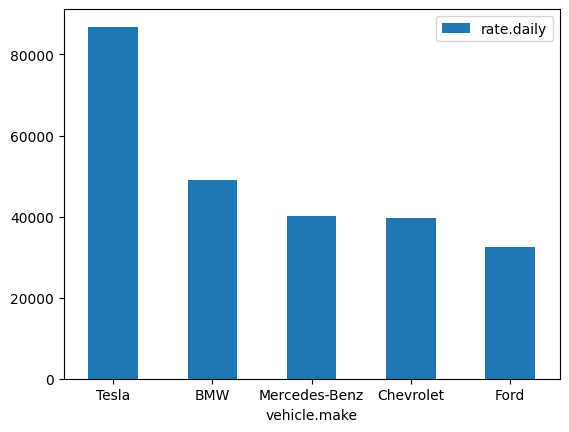

In [44]:
daily = df[['vehicle.make','rate.daily']]
daily = daily.groupby('vehicle.make', as_index=False).sum()
daily = daily.sort_values(by= ['rate.daily'], ascending=False)
daily = daily.iloc[:5]
daily.plot.bar(x = 'vehicle.make', y = 'rate.daily', rot = 0)

8) Visualize top 3 models under each car maker helping to make those avg daily rate



<Axes: xlabel='vehicle.model'>

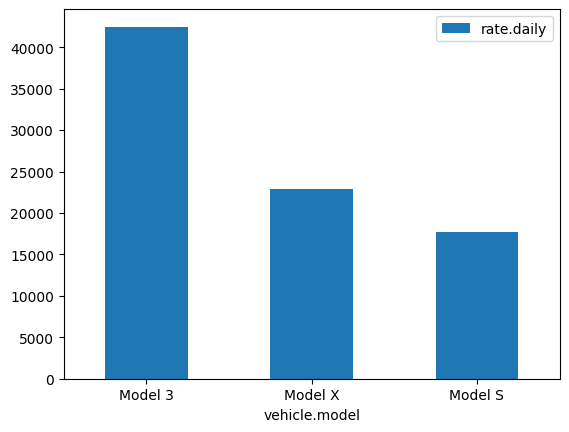

In [47]:
top_maker = list(daily['vehicle.make'])
mask = df['vehicle.make'].isin(top_maker)
city_o = df[mask]
city_o = city_o.groupby('vehicle.model', as_index=False).sum()
city_o = city_o.sort_values(by= ['rate.daily'], ascending=False)
top3_cityo = city_o.iloc[:3]
top3_cityo.plot.bar(x = 'vehicle.model', y = 'rate.daily', rot = 0)

9) Visualize vehicle type that makes most avg daily rates



<Axes: xlabel='vehicle.type'>

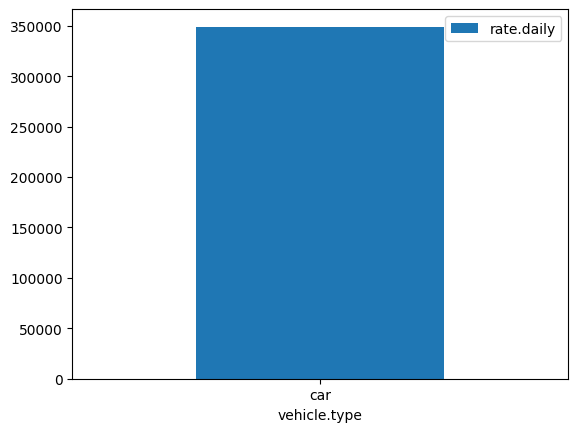

In [48]:
daily = df[['vehicle.type','rate.daily']]
daily = daily.groupby('vehicle.type', as_index=False).sum()
daily = daily.sort_values(by= ['rate.daily'], ascending=False)
daily = daily.iloc[:1]
daily.plot.bar(x = 'vehicle.type', y = 'rate.daily', rot = 0)

10) Visualize distribution of cars based on fuel type



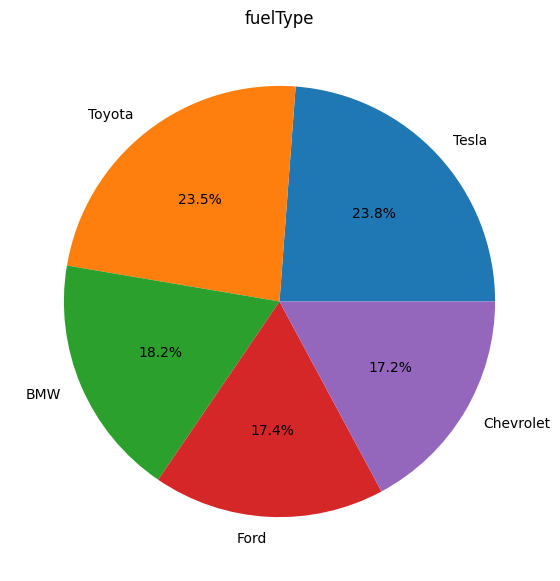

<Figure size 640x480 with 0 Axes>

In [38]:
labels=df['vehicle.make'].value_counts()[:5].index
values=df['vehicle.make'].value_counts()[:5].values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('fuelType')
plt.show()
plt.savefig('Fuel Type.png', format='png')

11) Avg daily rate based on fuel type



<Axes: xlabel='fuelType'>

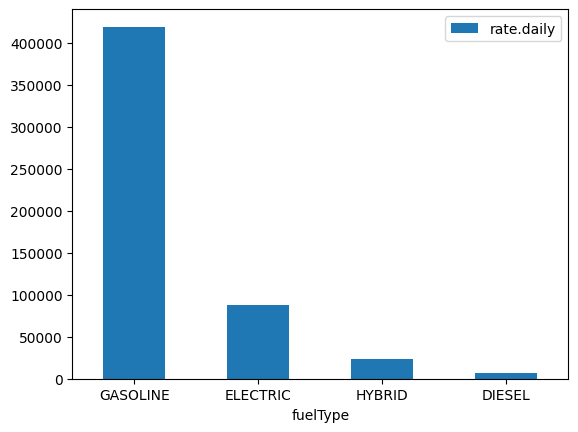

In [49]:
daily = df[['fuelType','rate.daily']]
daily = daily.groupby('fuelType', as_index=False).sum()
daily = daily.sort_values(by= ['rate.daily'], ascending=False)
# daily = daily.iloc[:1]
daily.plot.bar(x = 'fuelType', y = 'rate.daily', rot = 0)

12) Avg renter trips taken based on fuel type



Text(0.5, 1.0, 'Avg renter trips taken based on fuel type')

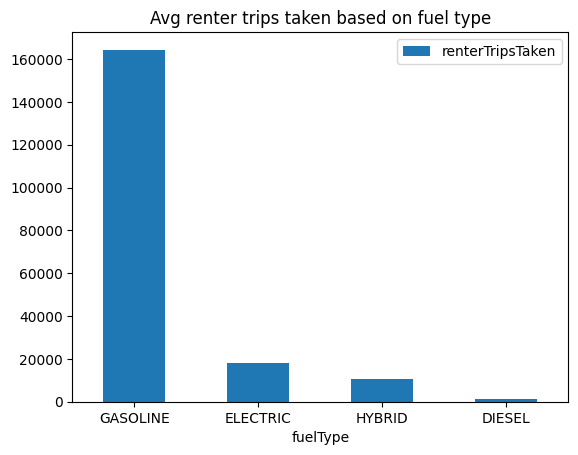

In [50]:
daily = df[['fuelType','renterTripsTaken']]
daily = daily.groupby('fuelType', as_index=False).sum()
daily = daily.sort_values(by= ['renterTripsTaken'], ascending=False)
# daily = daily.iloc[:1]
daily.plot.bar(x = 'fuelType', y = 'renterTripsTaken', rot = 0)
plt.title('Avg renter trips taken based on fuel type')

In [ ]:
13) Review counts based on fuel type



Text(0.5, 1.0, 'Review counts based on fuel type')

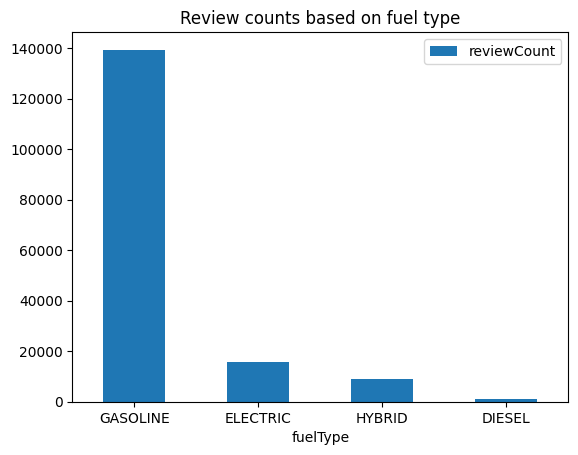

In [51]:
daily = df[['fuelType','reviewCount']]
daily = daily.groupby('fuelType', as_index=False).sum()
daily = daily.sort_values(by= ['reviewCount'], ascending=False)
# daily = daily.iloc[:1]
daily.plot.bar(x = 'fuelType', y = 'reviewCount', rot = 0)
plt.title('Review counts based on fuel type')

14) Does vehicles with most trips taken have a better review count?



In [53]:
daily = df[['vehicle.type','renterTripsTaken', 'reviewCount']]
daily = daily.groupby('vehicle.type', as_index=False).sum()
daily = daily.sort_values(by= ['renterTripsTaken'], ascending=False)
print (daily)
print ('It has the best review count')


  vehicle.type  renterTripsTaken  reviewCount
0          car          133901.0     114528.0
2          suv           50170.0      42263.0
1      minivan            7134.0       5806.0
3        truck            4282.0       3609.0
4          van             389.0        283.0
It has the best review count


15) Which vehicle type makes most rental trips



In [60]:
print ('{} make most rental trips '.format(daily.iloc[0][0]))

car make most rental trips 


/var/folders/cs/8r3m5sjs0rd7ts526sxtp81c0000gn/T/ipykernel_30820/326969067.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('{} make most rental trips '.format(daily.iloc[0][0]))
